In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("OTT.csv")

In [3]:
df.shape

(8807, 12)

Basic metric analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Find the number of blank/NA values

In [6]:
df.isna().sum(axis=0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

1. Un-nesting the columns
Cast, director, listed_in and country columns have nested values.

In [7]:
df["director"] = df["director"].str.split(", ")

In [8]:
df = df.explode("director")

In [9]:
df["cast"] = df["cast"].str.split(", ")

In [10]:
df = df.explode("cast")

In [11]:
df["country"] = df["country"].str.split(", ")

In [12]:
df = df.explode("country")

In [13]:
df["listed_in"] = df["listed_in"].str.split(", ")

In [14]:
df = df.explode("listed_in")

Fill null values with appropriate values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   title         201991 non-null  object
 3   director      151348 non-null  object
 4   cast          199845 non-null  object
 5   country       190094 non-null  object
 6   date_added    201833 non-null  object
 7   release_year  201991 non-null  int64 
 8   rating        201924 non-null  object
 9   duration      201988 non-null  object
 10  listed_in     201991 non-null  object
 11  description   201991 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [16]:
df["director"].fillna("Unknown Director",inplace=True)

In [17]:
df["cast"].fillna("Unknown Actor",inplace=True)

In [18]:
df["country"].fillna("Unknown Country",inplace=True)

In [19]:
df["date_added"].fillna("Unknown date",inplace=True)

In [20]:
df["rating"].fillna("Unknown rating",inplace=True)

In [21]:
df["duration"].fillna("Unknown duration",inplace=True)

In [22]:
df.reset_index(drop=True,inplace=True)

In [23]:
type(df[df["country"]==""])

pandas.core.frame.DataFrame

In [24]:
index = df[df["country"]==""].index
df.drop(index,inplace=True)

Unique attributes

In [25]:
df["director"].nunique()

4994

In [26]:
df["country"].nunique()

127

In [27]:
df["cast"].nunique()

36440

In [28]:
df["listed_in"].nunique()

42

In [29]:
df["rating"].nunique()

18

1. Find the counts of each categorical variable both using graphical and non-graphical analysis.

We will find count of categorical variables for columns country, listed_in, director, rating and cast. Since each row has been duplicated many times due to un-nesting, we can't get count simply by count function. We would have to use the count of "show_id" to get right count. We will get the count first, then plot graphs for highest 10 values since number of variables is too large.

In [30]:
x = df.groupby("country")["show_id"].nunique()
x

country
Afghanistan      1
Albania          1
Algeria          3
Angola           1
Argentina       91
                ..
Vatican City     1
Venezuela        4
Vietnam          7
West Germany     5
Zimbabwe         3
Name: show_id, Length: 127, dtype: int64

<Axes: xlabel='country'>

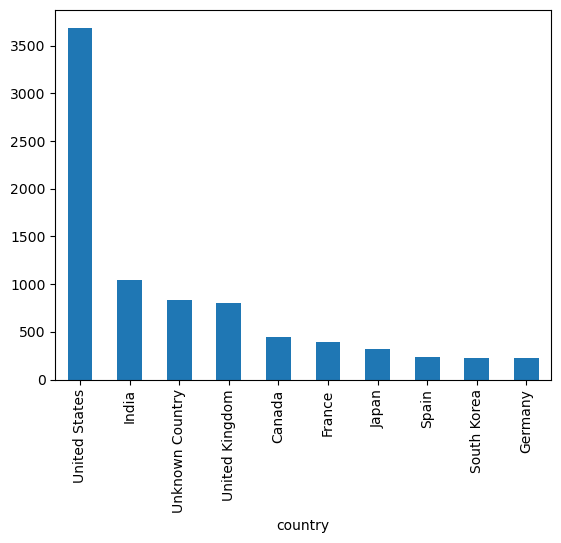

In [31]:
x.sort_values(ascending=False).head(10).plot(kind="bar")

In [32]:
x = df.groupby("listed_in")["show_id"].nunique()
x

listed_in
Action & Adventure               859
Anime Features                    71
Anime Series                     176
British TV Shows                 253
Children & Family Movies         641
Classic & Cult TV                 28
Classic Movies                   116
Comedies                        1674
Crime TV Shows                   470
Cult Movies                       71
Documentaries                    869
Docuseries                       395
Dramas                          2427
Faith & Spirituality              65
Horror Movies                    357
Independent Movies               756
International Movies            2752
International TV Shows          1351
Kids' TV                         451
Korean TV Shows                  151
LGBTQ Movies                     102
Movies                            57
Music & Musicals                 375
Reality TV                       255
Romantic Movies                  616
Romantic TV Shows                370
Sci-Fi & Fantasy            

<Axes: xlabel='listed_in'>

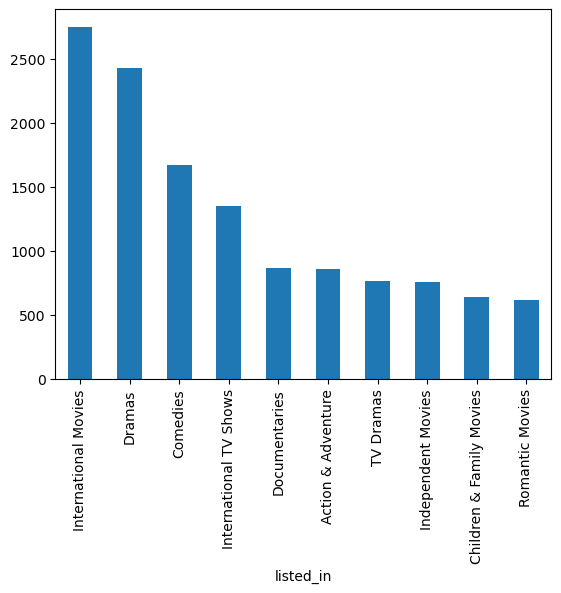

In [33]:
x.sort_values(ascending=False).head(10).plot(kind="bar")

In [34]:
x = df.groupby("type")["show_id"].nunique()
x

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

<Axes: xlabel='type'>

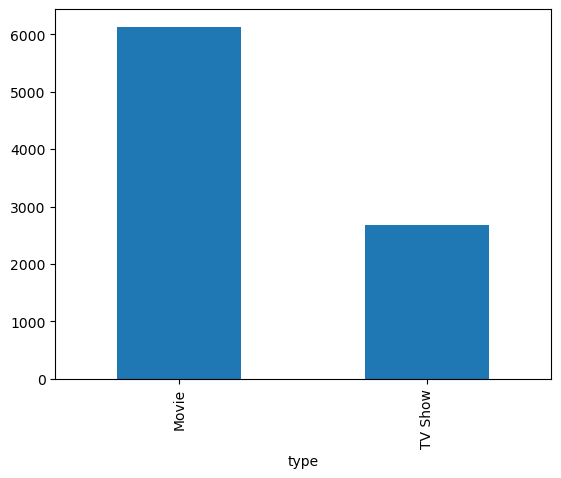

In [35]:
x.sort_values(ascending=False).plot(kind="bar")

In [36]:
x = df.groupby("director")["show_id"].nunique()
x

director
A. L. Vijay            2
A. Raajdheep           1
A. Salaam              1
A.R. Murugadoss        2
Aadish Keluskar        1
                      ..
Éric Warin             1
Ísold Uggadóttir       1
Óskar Thór Axelsson    1
Ömer Faruk Sorak       3
Şenol Sönmez           2
Name: show_id, Length: 4994, dtype: int64

<Axes: xlabel='director'>

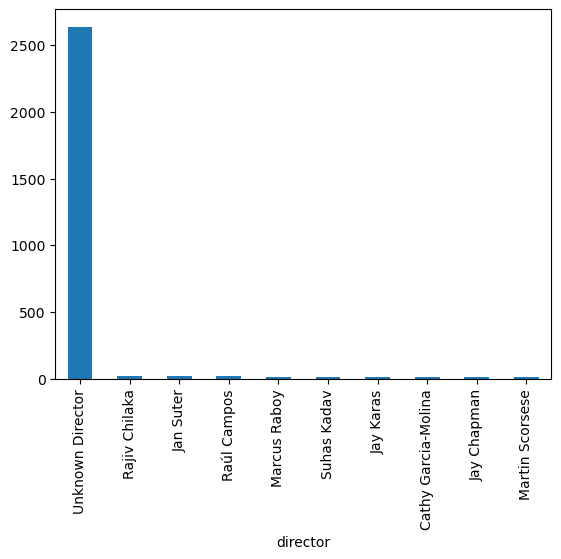

In [37]:
x.sort_values(ascending=False).head(10).plot(kind="bar")

In [38]:
x = df.groupby("rating")["show_id"].nunique()
x

rating
66 min               1
74 min               1
84 min               1
G                   41
NC-17                3
NR                  80
PG                 287
PG-13              490
R                  799
TV-14             2160
TV-G               220
TV-MA             3207
TV-PG              863
TV-Y               307
TV-Y7              334
TV-Y7-FV             6
UR                   3
Unknown rating       4
Name: show_id, dtype: int64

<Axes: xlabel='rating'>

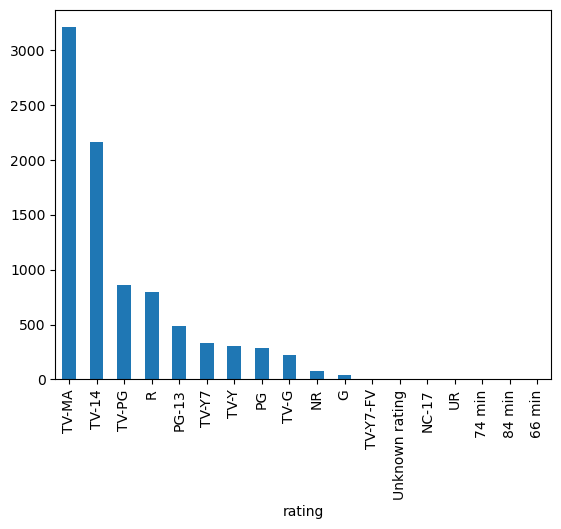

In [39]:
x.sort_values(ascending=False).plot(kind="bar")

In [40]:
x = df.groupby("cast")["show_id"].nunique()
x

cast
 Jr.                     2
"Riley" Lakdhar Dridi    1
'Najite Dede             2
2 Chainz                 1
2Mex                     1
                        ..
Şevket Çoruh             1
Şinasi Yurtsever         3
Şükran Ovalı             1
Şükrü Özyıldız           2
Ṣọpẹ́ Dìrísù             1
Name: show_id, Length: 36440, dtype: int64

<Axes: xlabel='cast'>

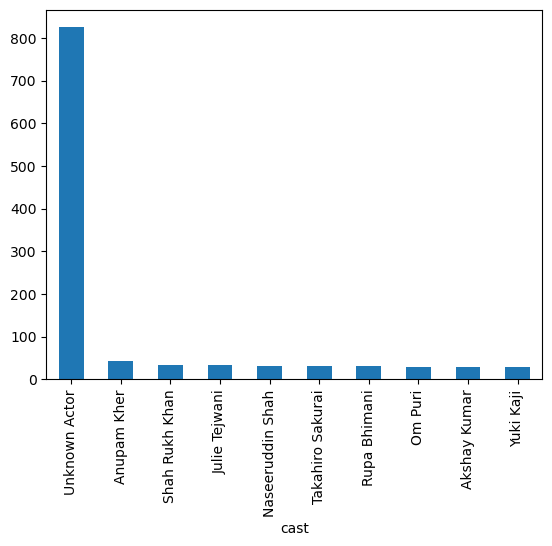

In [41]:
x.sort_values(ascending=False).head(10).plot(kind="bar")

2. Comparison of tv shows vs. movies.

a. Find the number of movies produced in each country and pick the top 10
countries.

In [42]:
x = df[df["type"]=="Movie"].groupby("country")["show_id"].nunique()
x.sort_values(ascending=False).head(10)

country
United States      2751
India               962
United Kingdom      532
Unknown Country     440
Canada              319
France              303
Germany             182
Spain               171
Japan               119
China               114
Name: show_id, dtype: int64

b. Find the number of Tv-Shows produced in each country and pick the top 10
countries.

In [43]:
x = df[df["type"]=="TV Show"].groupby("country")["show_id"].nunique()
x.sort_values(ascending=False).head(10)

country
United States      938
Unknown Country    391
United Kingdom     272
Japan              199
South Korea        170
Canada             126
France              90
India               84
Taiwan              70
Australia           66
Name: show_id, dtype: int64

3. What is the best time to launch a TV show?

a. Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies
First we will create columns for month and week by converting column "date_added" to datetime. Before that, we need to remove the rows where "date_added" is blank/unknown.

In [44]:
index = df[df["date_added"]=="Unknown date"].index
df.drop(index,inplace=True)

In [45]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [46]:
df["month"] = df["date_added"].dt.month

In [47]:
df["Week_of_year"] = df["date_added"].dt.strftime('%U').astype(int)

In [48]:
df["Week_of_year"].replace(0,1,inplace=True)

3(a,b) : Now, let's do the analysis for movies and TV-shows based on week and month.

In [49]:
x = df[df["type"]=="Movie"].groupby("Week_of_year")["show_id"].nunique()
x.sort_values(ascending=False)

Week_of_year
1     323
39    241
26    234
13    231
43    204
35    195
8     192
22    180
17    177
30    152
15    139
48    136
31    125
50    124
9     121
52    116
44    112
24    111
4     110
34    109
29    108
42    105
10    105
16    103
36    102
32    101
37    101
28    101
27    100
2      98
11     98
47     96
41     91
18     91
46     90
20     90
6      89
40     88
33     87
25     82
5      81
19     81
38     78
7      75
21     74
49     74
23     72
45     71
51     70
12     63
14     63
3      62
53      9
Name: show_id, dtype: int64

In [50]:
x = df[df["type"]=="TV Show"].groupby("Week_of_year")["show_id"].nunique()
x.sort_values(ascending=False)

Week_of_year
1     104
39     94
31     86
26     84
13     83
27     82
50     77
35     73
24     72
48     69
17     68
22     62
37     62
4      60
15     60
44     59
36     58
30     55
11     49
43     48
5      47
23     47
34     46
12     45
45     45
46     44
21     44
19     43
28     42
9      42
32     42
16     41
40     41
49     41
10     40
8      40
33     40
18     40
41     40
38     39
52     39
7      38
25     37
42     36
47     36
29     35
20     35
2      33
6      33
51     30
3      29
14     23
53      8
Name: show_id, dtype: int64

In [51]:
x = df[df["type"]=="Movie"].groupby("month")["show_id"].nunique()
x.sort_values(ascending=False)

month
7     565
4     550
12    547
1     546
10    545
3     529
8     519
9     519
11    498
6     492
5     439
2     382
Name: show_id, dtype: int64

In [52]:
x = df[df["type"]=="TV Show"].groupby("month")["show_id"].nunique()
x.sort_values(ascending=False)

month
12    266
7     262
9     251
6     236
8     236
10    215
4     214
3     213
11    207
5     193
1     192
2     181
Name: show_id, dtype: int64

4. Analysis of actors/directors of different types of shows/movies.

a. Identify the top 10 actor who have appeared in most movies or TV shows.

Since the question doesnt require us to do analysis separately for movie and TV-shows, we'll do a total analysis.

In [53]:
x = df.groupby("cast")["show_id"].nunique()
x.sort_values(ascending=False).head(10)

cast
Unknown Actor       825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Name: show_id, dtype: int64

b. Identify the top 10 directors who have appeared in most movies or TV shows

In [54]:
x = df.groupby("director")["show_id"].nunique()
x.sort_values(ascending=False).head(10)

director
Unknown Director       2624
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Marcus Raboy             16
Suhas Kadav              16
Jay Karas                15
Cathy Garcia-Molina      13
Jay Chapman              12
Martin Scorsese          12
Name: show_id, dtype: int64

5. Which genre movies are more popular or produced more

In [55]:
x = df.groupby("listed_in")["show_id"].nunique()
x.sort_values(ascending=False).head(15)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
TV Comedies                  574
Crime TV Shows               469
Kids' TV                     449
Docuseries                   394
Name: show_id, dtype: int64

6. Find After how many days the movie will be added to OTT after the release of the movie (you can consider the recent past data)

In [56]:
df["year_added"] = df["date_added"].dt.year

In [57]:
df["year_diff"] = df["year_added"] - df["release_year"]

In [58]:
df["year_diff"].mode()

0    0
Name: year_diff, dtype: int64

How has the number of movies released per year changed over the last 20-30 years?

<Axes: xlabel='release_year', ylabel='show_id'>

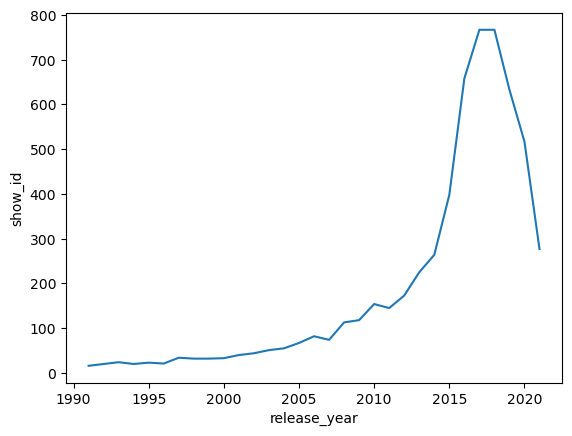

In [59]:
x = df[(df["release_year"]<=df["release_year"].max()) & (df["release_year"]>=df["release_year"].max()-30) & (df["type"]=="Movie")]
x = x.groupby("release_year")["show_id"].nunique()
x = pd.DataFrame(x.reset_index())
sns.lineplot(x="release_year", y = "show_id", data = x)

Does OTT has more focus on TV Shows than movies in recent years?

Let's take a timeframe of last 10 years

<Axes: xlabel='type'>

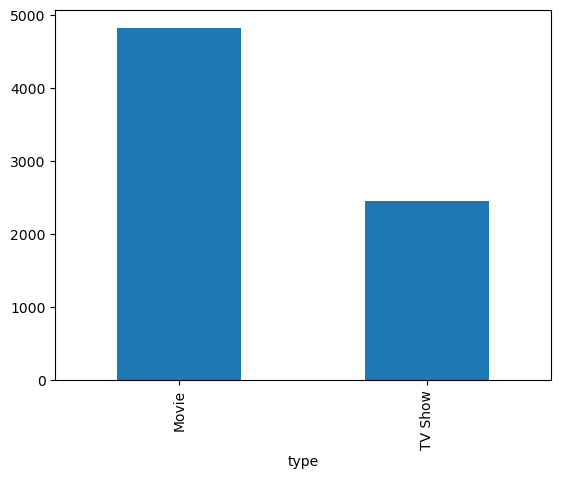

In [60]:
x = df[(df["release_year"]<=df["release_year"].max()) & (df["release_year"]>=df["release_year"].max()-10)]
x = x.groupby("type")["show_id"].nunique()
x.plot(kind="bar")

Understanding what content is available in different countries

In [61]:
x = df.groupby("country")["type"].nunique()
x = pd.DataFrame(x.reset_index())

x["type"].value_counts()

1    66
2    61
Name: type, dtype: int64

Relation between ratings and countries

<Axes: xlabel='rating'>

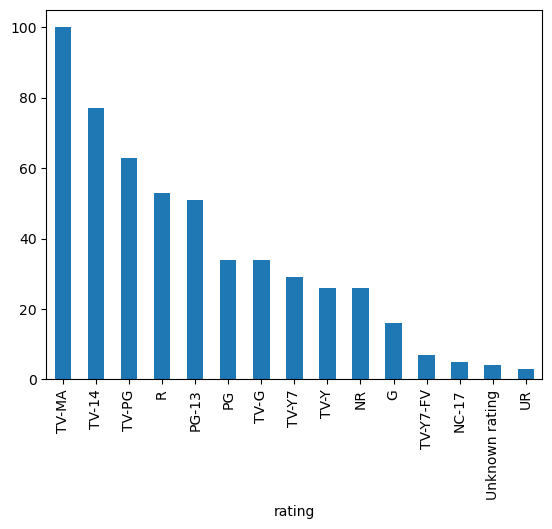

In [62]:
x = df.groupby("rating")["country"].nunique()
x.sort_values(ascending=False).head(15).plot(kind="bar")

Business Insights:

1) Data is available only for 127 and there is a huge number of content for which country data is not present.

2) First analysis(29,30) shows that USA has highest content. Though US does create a lot of content, this might be due to higher and better data collection from US and due to country data not being available for a lot of content in data. Case in point, it is well known that India creates highest number of content in world.

3) International movies category has the highest percentage in the current data, closely followed by Dramas and then comedies. There isnt much to decode from here since a content can be tagged in multiple categories.

4) As per available data, as compared to TV shows, movies still rule the roost in terms of quantity. This is true even for last 10 years.

5) "TVMA" rating has the highest percentage on the current content data. This might be due to the fact that it is used for both movies and TV shows. This rating also has most content available in highest number of countries.

6) A disproportionally large data doesn't have any value in for cast. Other than that, Indian actors have the most content credits.

7) Nearly one-third of data doesn't have any data for director's credit.

8) USA rules both in terms of number of movies and TV shows.

9) If we go by content released on OTT, first week of year has highest number of releases for both movie and TV shows. This followed by week number 39 which falls in Septemeber.

10) Release of movie and TV shows doesn't have any clear insight in terms of release month.

11) Data shows that most of the times, majority of content is made available on OTT at the time of it's actual release. This might be due to the fact that only year is available for "release_date" instead of date.

12) Data clearly shows that number of movies has increased repidly after 2012 but declined in later years (maybe due to pandemic).

13) As per data, more than half of countries has either movies or TV show availabilty. Both type of content is available only in less than half of countries.


Recommendations:

1) The first and foremost thing to do is to increase the data availabilty. The data has lots of important missing values. This could be done by making it compulsory in the data entry software being used to enter values in atleast important fields like country and director. Better data leads to better analysis.

2) It would be better if budget, revenue and customer-review score could also be added to data. That would make analysis more detailed and business oriented.

3) New content and hence data should be added for emerging countries like India. This would help in calibrate the strategy by better analysis.

4) Wherever possible, both type of content (movies and TV shows) should be made available in majority countries. Right now, more than half of countries has only one type of content available.

5) Full date should be used for "release date" data.

6) OTT should make more shows targeted at emerging markets like India.

7) Efforts should be made to collect data from countries other than USA. Currently, most of the content data is USA dominated.